In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import seaborn as sns


In [2]:
from google.colab import files
file=files.upload()

Saving india.csv to india.csv


In [11]:
df=read_csv("india.csv",header=0)

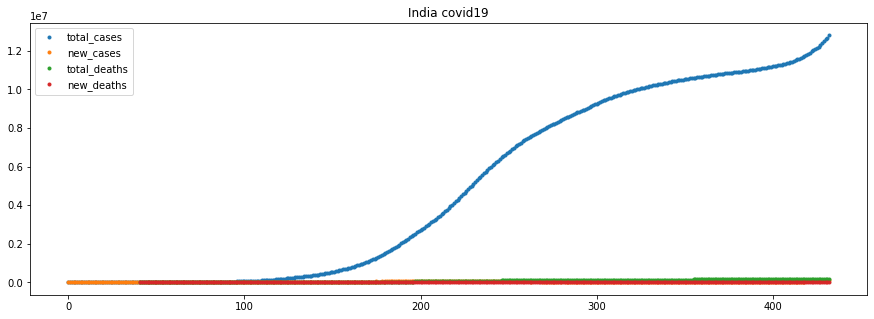

In [12]:
color_pal = ["#F8766D", "#66C2A5", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
df.plot(style='.', figsize=(15,5),title='India covid19')
plt.show()

In [13]:
df.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths
0,India,2020-01-30,1,1,NaN,NaN
1,India,2020-01-31,1,0,NaN,NaN
2,India,2020-02-01,1,0,NaN,NaN
3,India,2020-02-02,2,1,NaN,NaN
4,India,2020-02-03,3,1,NaN,NaN


In [14]:
df.dtypes

location         object
date             object
total_cases       int64
new_cases         int64
total_deaths    float64
new_deaths      float64
dtype: object

In [15]:
df.shape

(433, 6)

In [16]:
new_df=pd.DataFrame(df,columns=["date","total_cases"])
new_df.head()

,date,total_cases
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3


In [17]:
new_df.columns=['ds','y']
new_df.head()


,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3


In [18]:
new_df['ds']= pd.to_datetime(new_df['ds'])
new_df.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3


In [19]:
train=new_df.drop(new_df.index[-150:])

In [20]:
train.shape

(283, 2)

In [21]:
train.tail()

,ds,y
278,2020-11-03,8313876
279,2020-11-04,8364086
280,2020-11-05,8411724
281,2020-11-06,8462080
282,2020-11-07,8507754


In [22]:
model =Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


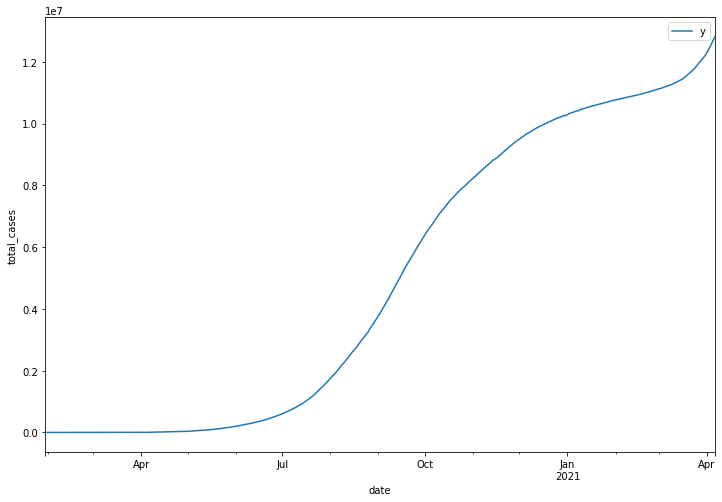

In [23]:
ax = new_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('total_cases')
ax.set_xlabel('date')

plt.show()

In [28]:
future = model.make_future_dataframe(periods=40, freq='D')
prediction = model.predict(future)
prediction[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
313,2020-12-08,1.098752e+07,1.072042e+07,1.123218e+07
314,2020-12-09,1.105772e+07,1.076820e+07,1.131163e+07
315,2020-12-10,1.112728e+07,1.083712e+07,1.138160e+07
316,2020-12-11,1.119691e+07,1.089775e+07,1.146167e+07
317,2020-12-12,1.126702e+07,1.096384e+07,1.156753e+07
318,2020-12-13,1.134405e+07,1.102900e+07,1.163638e+07
319,2020-12-14,1.140955e+07,1.106616e+07,1.172711e+07
320,2020-12-15,1.147722e+07,1.113096e+07,1.180780e+07
321,2020-12-16,1.154742e+07,1.116840e+07,1.189018e+07
322,2020-12-17,1.161697e+07,1.124518e+07,1.196640e+07


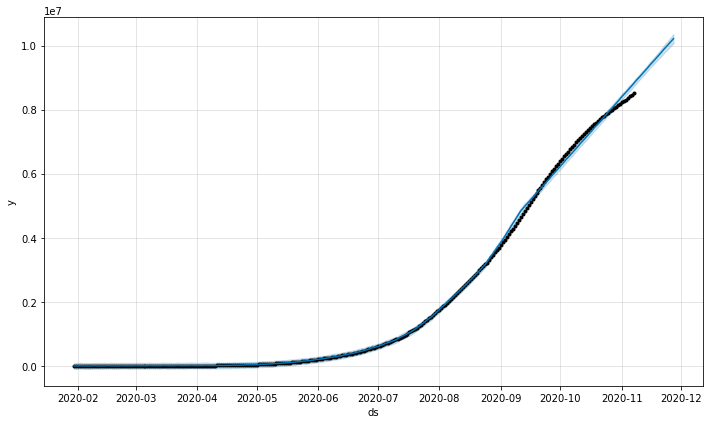

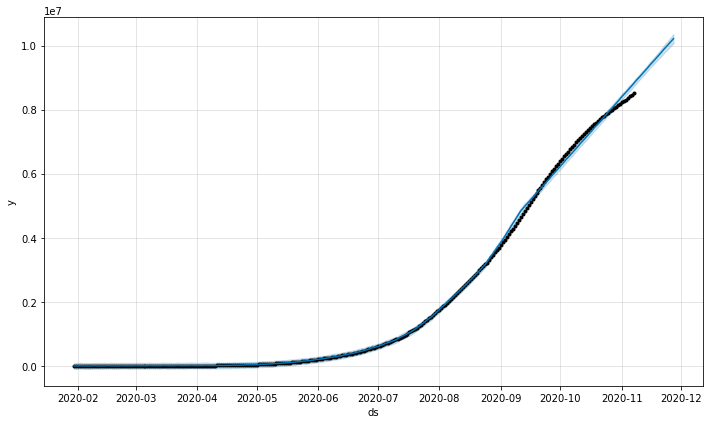

In [25]:
model.plot(prediction)

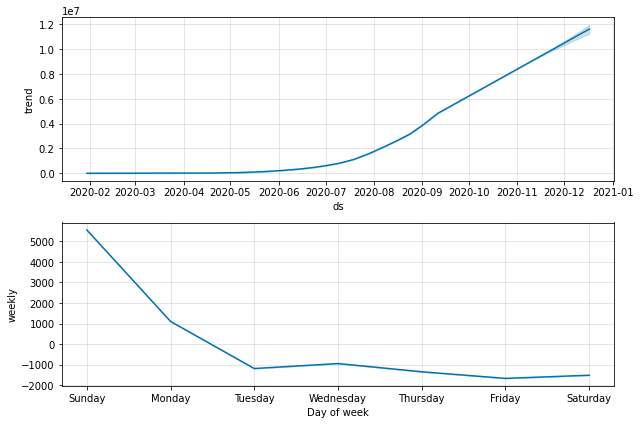

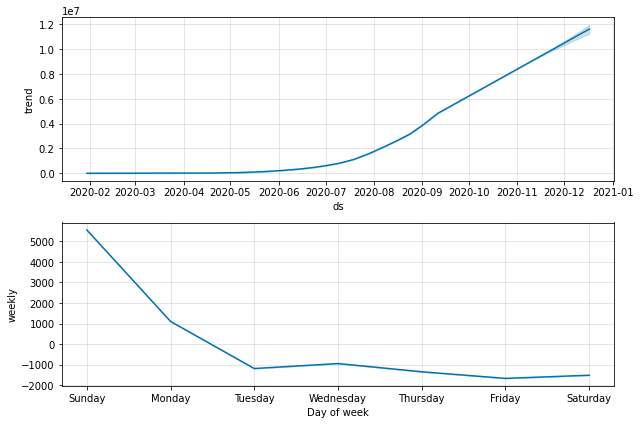

In [29]:
model.plot_components(prediction)

In [ ]:
new_df=df[['date','new_cases']]
new_df['ds']=new_df['date']
new_df['y']=new_df['new_cases']
new_df.drop(columns=['date','new_cases'], inplace=True)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,ds,y
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1


In [ ]:
from fbprophet import Prophet
model=Prophet()
model.fit(new_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


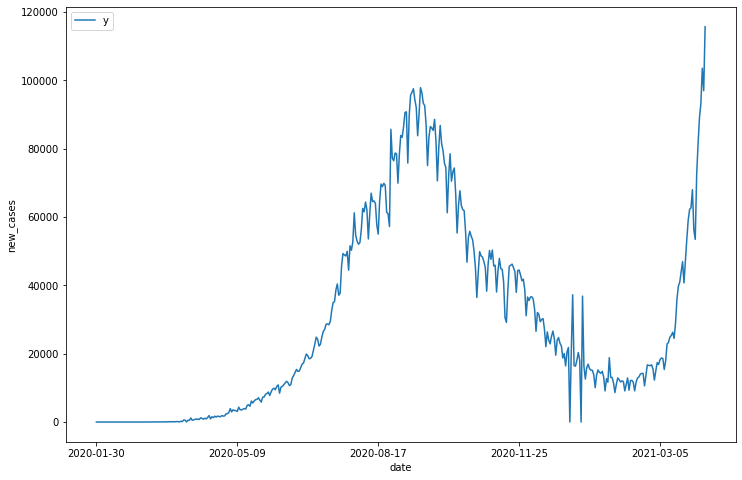

In [ ]:
ax = new_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('new_cases')
ax.set_xlabel('date')
plt.show()


In [ ]:
future = model.make_future_dataframe(periods=0)
future.head()

,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03


In [ ]:
forecast=model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
426,2021-03-31,45988.905232,33331.119869,58772.268267
427,2021-04-01,45904.084206,34317.240120,57849.267510
428,2021-04-02,46665.877903,34199.683831,58524.455565
429,2021-04-03,47917.355130,36006.815581,60012.879981
430,2021-04-04,46586.293051,34466.093271,59377.519147
431,2021-04-05,43124.592240,31466.280872,55356.148018
432,2021-04-06,46913.739800,34768.394670,59161.419776


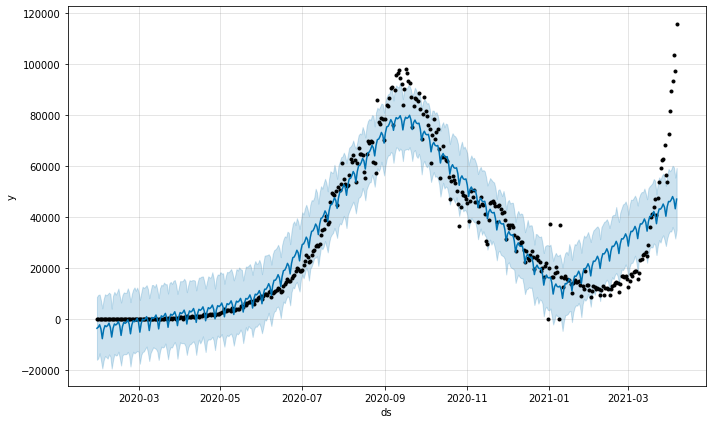

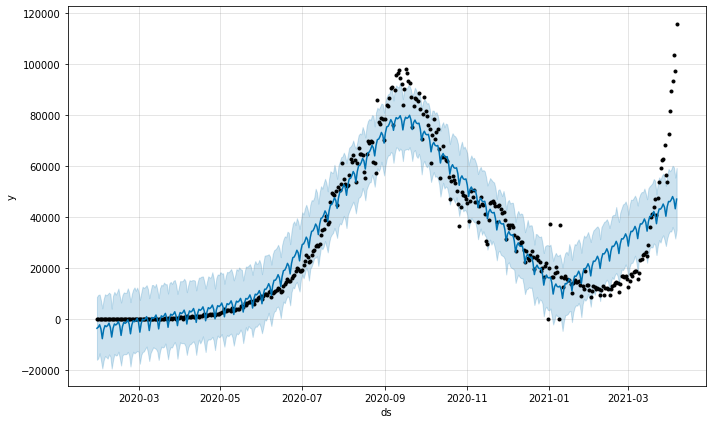

In [ ]:
model.plot(forecast)

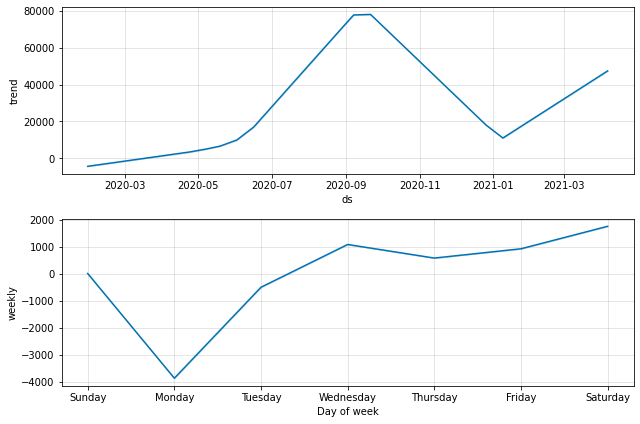

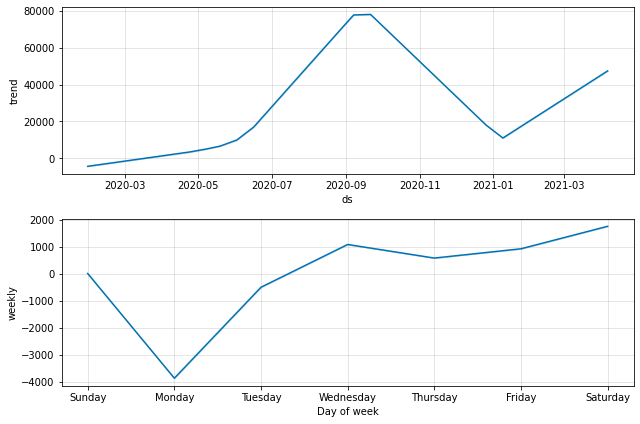

In [ ]:
model.plot_components(forecast)